In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer  # Similar to WBCD
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load WBCD dataset (from sklearn, similar to UCI with 569 samples and 30 features, no missing values)
#data_wbcd = load_breast_cancer()
#X_wbcd = data_wbcd.data
#y_wbcd = data_wbcd.target  # 0: malignant, 1: benign

# For the original UCI WBCD dataset (uncomment if you have internet access):
wbcd_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
wbcd_columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion',
               'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
wbcd = pd.read_csv(wbcd_url, names=wbcd_columns)
wbcd.replace('?', np.nan, inplace=True)
wbcd['bare_nuclei'] = wbcd['bare_nuclei'].astype(float)
X_wbcd = wbcd.iloc[:, 1:-1].values
y_wbcd = wbcd['class'].map({2: 0, 4: 1}).values

# Function to evaluate models (as in the article)
def evaluate_models(X, y, imputation_strategy=None):
    if imputation_strategy:
        imputer = SimpleImputer(strategy=imputation_strategy)
        X = imputer.fit_transform(X)

    extractors = {
        'LDA': LinearDiscriminantAnalysis(n_components=1),
        'PCA': PCA(n_components=2)
    }

    classifiers = {
        'SVM': SVC(kernel='rbf', C=1.0),
        'RF': RandomForestClassifier(random_state=42)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

    results = {}
    for ext_name, extractor in extractors.items():
        for clf_name, clf in classifiers.items():
            pipeline = Pipeline([('extractor', extractor), ('classifier', clf)])
            cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)
            results[f'{ext_name}-{clf_name}'] = {
                'accuracy': np.mean(cv_results['test_accuracy']) * 100,
                'precision': np.mean(cv_results['test_precision']) * 100,
                'recall': np.mean(cv_results['test_recall']) * 100,
                'f1': np.mean(cv_results['test_f1']) * 100
            }
    return results

# Evaluate for WBCD (no imputation needed for sklearn dataset, but mean/median added for completeness)
# For the original UCI dataset, imputation is necessary
wbcd_mean_results = evaluate_models(X_wbcd, y_wbcd, 'mean')
wbcd_median_results = evaluate_models(X_wbcd, y_wbcd, 'median')

# Display results
print('WBCD Results with Mean Imputation:')
print(wbcd_mean_results)
print('\nWBCD Results with Median Imputation:')
print(wbcd_median_results)

WBCD Results with Mean Imputation:
{'LDA-SVM': {'accuracy': np.float64(97.13874614594037), 'precision': np.float64(94.50238151462912), 'recall': np.float64(97.51700680272108), 'f1': np.float64(95.9333378009864)}, 'LDA-RF': {'accuracy': np.float64(95.42343268242549), 'precision': np.float64(93.10657596371883), 'recall': np.float64(93.77551020408163), 'f1': np.float64(93.4040074293768)}, 'PCA-SVM': {'accuracy': np.float64(96.99588900308326), 'precision': np.float64(93.00611855772787), 'recall': np.float64(98.76700680272108), 'f1': np.float64(95.78153570459087)}, 'PCA-RF': {'accuracy': np.float64(95.99486125385405), 'precision': np.float64(92.50147550659061), 'recall': np.float64(96.26700680272108), 'f1': np.float64(94.30320223511713)}}

WBCD Results with Median Imputation:
{'LDA-SVM': {'accuracy': np.float64(97.28160328879754), 'precision': np.float64(94.51124676285609), 'recall': np.float64(97.93367346938776), 'f1': np.float64(96.14825008168815)}, 'LDA-RF': {'accuracy': np.float64(94.85

In [19]:
wpbc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'
wpbc_columns = ['id', 'outcome', 'time', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
                'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points',
                 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter',
                 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points',
                 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points',
                 'worst_symmetry', 'worst_fractal_dimension', 'tumor_size', 'lymph_node_status']
wpbc = pd.read_csv(wpbc_url, names=wpbc_columns)
wpbc.replace('?', np.nan, inplace=True)
wpbc['lymph_node_status'] = wpbc['lymph_node_status'].astype(float)
X_wpbc = wpbc.iloc[:, 3:].values
y_wpbc = wpbc['outcome'].map({'N': 0, 'R': 1}).values
wpbc_median_results = evaluate_models(X_wpbc, y_wpbc, 'median')
print('WPBC Results with Median Imputation:', wpbc_median_results)

WPBC Results with Median Imputation: {'LDA-SVM': {'accuracy': np.float64(74.24358974358974), 'precision': np.float64(51.92857142857142), 'recall': np.float64(25.11111111111111), 'f1': np.float64(30.531279178338)}, 'LDA-RF': {'accuracy': np.float64(65.62820512820512), 'precision': np.float64(27.756132756132757), 'recall': np.float64(33.77777777777777), 'f1': np.float64(30.178338001867417)}, 'PCA-SVM': {'accuracy': np.float64(75.25641025641025), 'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1': np.float64(0.0)}, 'PCA-RF': {'accuracy': np.float64(71.21794871794872), 'precision': np.float64(36.32034632034632), 'recall': np.float64(20.888888888888886), 'f1': np.float64(25.0)}}


WBCD Results with Mean Imputation:
{'LDA-SVM': {'accuracy': np.float64(97.13874614594037), 'precision': np.float64(94.50238151462912), 'recall': np.float64(97.51700680272108), 'f1': np.float64(95.9333378009864)}, 'LDA-RF': {'accuracy': np.float64(95.42343268242549), 'precision': np.float64(93.10657596371883), 'recall': np.float64(93.77551020408163), 'f1': np.float64(93.4040074293768)}, 'PCA-SVM': {'accuracy': np.float64(96.99588900308326), 'precision': np.float64(93.00611855772787), 'recall': np.float64(98.76700680272108), 'f1': np.float64(95.78153570459087)}, 'PCA-RF': {'accuracy': np.float64(95.99486125385405), 'precision': np.float64(92.50147550659061), 'recall': np.float64(96.26700680272108), 'f1': np.float64(94.30320223511713)}}

WBCD Results with Median Imputation:
{'LDA-SVM': {'accuracy': np.float64(97.28160328879754), 'precision': np.float64(94.51124676285609), 'recall': np.float64(97.93367346938776), 'f1': np.float64(96.14825008168815)}, 'LDA-RF': {'accuracy': np.float64(94.85

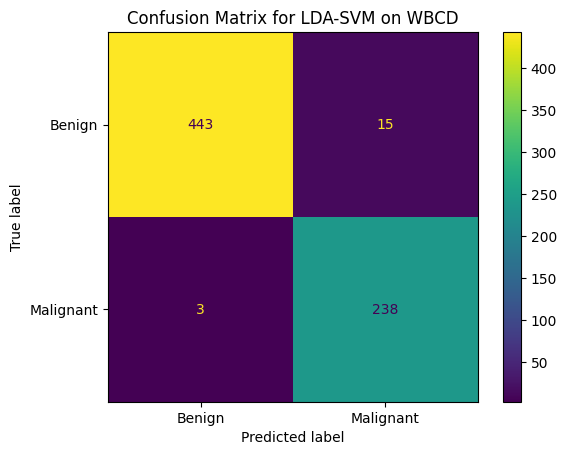

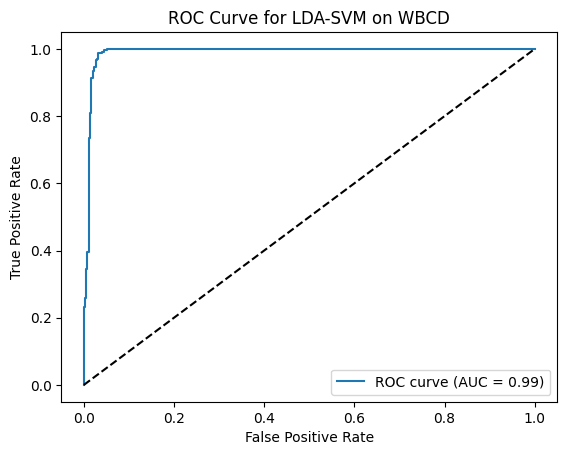

In [16]:
# Confusion Matrix and ROC Curve for LDA-SVM with Median Imputation
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Adding imputation
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('svm', SVC(kernel='rbf', probability=True))
])
pipeline.fit(X_wbcd, y_wbcd)
y_pred = pipeline.predict(X_wbcd)
y_prob = pipeline.predict_proba(X_wbcd)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_wbcd, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()
plt.title('Confusion Matrix for LDA-SVM on WBCD')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_wbcd, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WBCD')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': ['scale', 'auto', 0.1, 0.01]}
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('svm', SVC(kernel='rbf', probability=True))
])
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_wbcd, y_wbcd)
print('Best parameters:', grid.best_params_)
print('Best accuracy:', grid.best_score_ * 100)

Best parameters: {'svm__C': 0.1, 'svm__gamma': 'auto'}
Best accuracy: 96.42754367934224


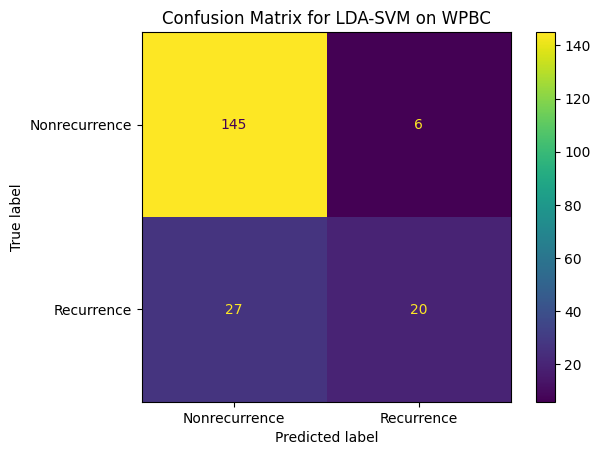

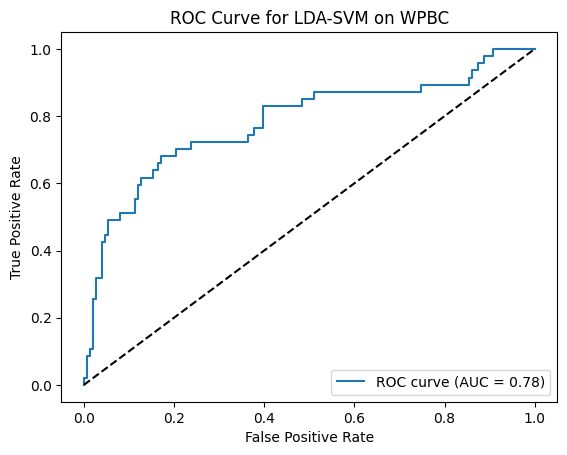

In [17]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('svm', SVC(kernel='rbf', probability=True))
])
pipeline.fit(X_wpbc, y_wpbc)
y_pred = pipeline.predict(X_wpbc)
y_prob = pipeline.predict_proba(X_wpbc)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_wpbc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nonrecurrence', 'Recurrence'])
disp.plot()
plt.title('Confusion Matrix for LDA-SVM on WPBC')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_wpbc, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA-SVM on WPBC')
plt.legend(loc='lower right')
plt.show()